# Predicting the income level of countries (multiclassification)
The Global Financial Development Database is an extensive dataset of financial system characteristics for 214 economies. It contains annual data, starting from 1960. It has been last updated in September 2022 and contains data through 2021 for 108 indicators, capturing various aspects of financial institutions and markets. Please, be advised that the latest release presents some changes in methodology, which have been properly identified in blue in the tab "Metadata". 

### General information
The Global Financial Development Database is based on a “4x2 framework”. Specifically, it includes measures of (1) depth, (2) access, (3) efficiency, and (4) stability of financial systems. Each of these characteristics captures both (1) financial institutions (for example banks and insurance companies), and (2) financial markets (such as stock markets and bond markets). It also provides other useful indicators, such as measures of concentration and competition in the banking sector. The database builds on, updates, and extends previous efforts, in particular the data collected for the Database on Financial Development and Structure.
 
For more on the Global Financial Development Database, the 4x2 framework, and the underlying theoretical and empirical literature, see chapter 1 of the 2013 Global Financial Development Report, and also Cihák, Martin, Asli Demirgüç-Kunt, Erik Feyen, and Ross Levine (2012) “Benchmarking Financial Systems around the World.” Policy Research Working Paper 6175, World Bank, Washington, DC. (A version of the paper appeared in the Journal of Financial Perspectives.)

#### Disclaimer
The World Bank is not responsible for the quality or accuracy of the information reported in the database. The data set may contain errors and omissions. For a description of the various indicators, please refers to the concepts and definitions reported in the Metadata tab. The original source of the data is also identified. Users are advised to consult the accompanying metadata and contact directly the original data providers for specific inquiries on data points and series.

Release Date
September 2022

Last Updated
September 2022

Authors
Davide S. Mare (project lead), Ata Can Bertay, and Nan Zhou. Please contact research@worldbank.org for any queries.

### Frameworks
#### 1. Problem Definition:
The problem we will be exploring is multi-class classification( i.e a type of supervised learning where a model predicts a target/dependent variable to be three or more possible categories). To predict the income levels of each countries based on the historical features of these countries
   
#### 2. What data are we using?
The original data came from Global Financial Development Database: https://www.worldbank.org/en/publication/gfdr/data/global-financial-development-database.It is a *timeseries* data(from 1960 till 2022) containing 115 attributes/features(attributes are also reffered to as independent varibales).

#### Income class variable

- High income
- Upper middle income
- Lower middle income
- Low income

#### 3. proof of concept: 
if we can reach an accuracy of 90percent at predicting the income levels of the countires we'll pursue this project.

In [1]:
# Eda
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import datetime
import scipy # to check the skeweness value
from scipy.stats import skew

# modelling
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split


print(f"notebook was last run {datetime.datetime.now()}")

notebook was last run 2025-02-28 13:14:40.287255


In [2]:
# Data dictionary
data = {
    "Indicator Code": ["GFDD.AI.01","GFDD.AI.02","GFDD.AI.03","GFDD.AI.04","GFDD.AI.05","GFDD.AI.06","GFDD.AI.07",
                       "GFDD.AI.08","GFDD.AI.09","GFDD.AI.10","GFDD.AI.11","GFDD.AI.12",
                       "GFDD.AI.13", "GFDD.AI.14", "GFDD.AI.15", "GFDD.AI.16", "GFDD.AI.17",
                       "GFDD.AI.18", "GFDD.AI.19", "GFDD.AI.20", "GFDD.AI.21", "GFDD.AI.22", "GFDD.AI.23",
                      "GFDD.AI.24", "GFDD.AI.25", "GFDD.AI.26", "GFDD.AI.27", "GFDD.AI.28", "GFDD.AI.29", "GFDD.AI.30", 
                      "GFDD.AI.31", "GFDD.AI.32", "GFDD.AI.33", "GFDD.AI.34", "GFDD.AI.35", "GFDD.AI.36", "GFDD.AM.01",
                      "GFDD.AM.02", "GFDD.AM.03", "GFDD.AM.04", "GFDD.DI.01", "GFDD.DI.02", "GFDD.DI.03", "GFDD.DI.04",
                      "GFDD.DI.05", "GFDD.DI.06", "GFDD.DI.07", "GFDD.DI.08", "GFDD.DI.09", "GFDD.DI.10", "GFDD.DI.11",
                      "GFDD.DI.12", "GFDD.DI.13", "GFDD.DI.14", "GFDD.DM.01", "GFDD.DM.02", "GFDD.DM.03", "GFDD.DM.04",
                      "GFDD.DM.05", "GFDD.DM.06", "GFDD.DM.07", "GFDD.DM.08", "GFDD.DM.09", "GFDD.DM.10", "GFDD.DM.11",
                      "GFDD.DM.12", "GFDD.DM.13", "GFDD.DM.14", "GFDD.DM.15", "GFDD.DM.16", "GFDD.EI.01", "GFDD.EI.02",
                      "GFDD.EI.03", "GFDD.EI.04" "GFDD.EI.05", "GFDD.EI.06", "GFDD.EI.07", "GFDD.EI.08", "GFDD.EI.09",
                      "GFDD.EI.10", "GFDD.EM.01", "GFDD.SI.01", "GFDD.SI.02", "GFDD.SI.03", "GFDD.SI.04", "GFDD.SI.05",
                      "GFDD.SI.06", "GFDD.SI.07", "GFDD.SM.01", "GFDD.OI.01", "GFDD.OI.02", "GFDD.OI.03", "GFDD.OI.04",
                      "GFDD.OI.05", "GFDD.OI.06", "GFDD.OI.07", "GFDD.OI.08", "GFDD.OI.09", "GFDD.OI.10", "GFDD.OI.11",
                      "GFDD.OI.12", "GFDD.OI.13", "GFDD.OI.14", "GFDD.OI.15", "GFDD.OI.16", "GFDD.OI.16a", "GFDD.OI.17",
                      "GFDD.OI.18", "GFDD.OI.19", "GFDD.OI.20", "GFDD.OM.01", "GFDD.OM.02","GFDD.OM.02"],
    "Indicator Name": ["Bank accounts per 1,000 adults", "Bank branches per 100,000 adults", "Firms with a bank loan or line of credit (%)",
                      "Small firms with a bank loan or line of credit (%)", "Financial institution account (% age 15+)",
                      "Saved at a financial institution (% age 15+)", "Borrowed from a formal financial institution (% age 15+)",
                      "Borrowed to start, operate, or expand a farm or business (% age 15+)", 
                       "Received government transfer: into a financial institution account (% age 15+)",
                      "Received domestic remittances: into an account (% age 15+)",
                      "Received wages: into a financial institution account (% age 15+)",
                      "Saved any money (% age 15+)","Saved using a savings club or a person outside the family (% age 15+)",
                      "Borrowed any money (% age 15+)","Loan from a private lender in the past year (% age 15+)",
                      "Loan from an employer in the past year (% age 15+)","Borrowed from a store by buying on credit (% age 15+)",
                      "Borrowed from family or friends (% age 15+)","Used checks to make payments(% age 15+)","Owns a credit card (% age 15+)",
                      "Owns a debit card (% age 15+)","Made a digital payment (% age 15+)","Made a utility payment: using a mobile phone (% age 15+)",
                      "Sent domestic remittances: using an account (% age 15+)","ATMs per 100,000 adults",
                      "Has an inactive account (% age 15+)","Firms with a checking or savings account (%)",
                      "Firms using banks to finance investments (%)","Firms using banks to finance working capital (%)",
                      "Loans requiring collateral (%)","Value of collateral needed for a loan (% of the loan amount)",
                      "Firms not needing a loan (%)","Firms whose recent loan application was rejected (%)",
                      "Investments financed by banks (%)","Working capital financed by banks (%)",
                      "Firms identifying access to finance as a major constraint (%)","Value traded excluding top 10 traded companies to total value traded (%)",
                      "Market capitalization excluding top 10 companies to total market capitalization (%)",
                      "Nonfinancial corporate bonds to total bonds and notes outstanding (%)",
                      "Investments financed by equity or stock sales (%)","Private credit by deposit money banks to GDP (%)",
                      "Deposit money banks' assets to GDP (%)","Nonbank financial institutions’ assets to GDP (%)",
                      "Deposit money bank assets to deposit money bank assets and central bank assets (%)","Liquid liabilities to GDP (%)",
                      "Central bank assets to GDP (%)","Mutual fund assets to GDP (%)","Financial system deposits to GDP (%)",
                      "Life insurance premium volume to GDP (%)","Nonlife insurance premium volume to GDP (%)","Insurance company assets to GDP (%)",
                      "Private credit by deposit money banks and other financial institutions to GDP (%)","Pension fund assets to GDP (%)",
                      "Domestic credit to private sector (% of GDP)","Stock market capitalization to GDP (%)","Stock market total value traded to GDP (%)",
                      "Outstanding domestic private debt securities to GDP (%)","Outstanding domestic public debt securities to GDP (%)",
                      "Outstanding international private debt securities to GDP (%)","Outstanding international public debt securities to GDP (%)",
                      "Outstanding total international debt securities / GDP (%)","Gross Portfolio Equity & Investment Fund Shares Liabilities / GDP",
                      "Gross Portfolio Equity & Investment Fund Shares Assets / GDP","Gross portfolio debt liabilities to GDP (%)",
                      "Gross portfolio debt assets to GDP (%)","Syndicated loan issuance volume to GDP (%)","Corporate bond issuance volume to GDP (%)",
                      "Syndicated loan average maturity (years)","Corporate bond average maturity (years)","Credit flows by fintech and bigtech companies to GDP (%)",
                      "Bank net interest margin (%)","Bank lending-deposit spread","Bank noninterest income to total income (%)","Bank overhead costs to total assets (%)",
                      "Bank return on assets (%, after tax)","Bank return on equity (%, after tax)","Bank cost to income ratio (%)",
                      "Credit to government and state owned enterprises to GDP (%)","Bank return on assets (%, before tax)","Bank return on equity (%, before tax)",
                      "Stock market turnover ratio (%)","Bank Z-score","Bank nonperforming loans to gross loans (%)","Bank capital to total assets (%)",
                      "Bank credit to bank deposits (%)","Bank regulatory capital to risk-weighted assets (%) ","Liquid assets to deposits and short term funding (%)",
                      "Provisions to nonperforming loans (%)","Stock price volatility","Bank concentration (%)","Bank deposits to GDP (%)","H-statistic","Lerner index",
                      "Boone indicator","5-bank asset concentration","Liquid liabilities in millions USD (2010 constant)","Debt securities by offshore investors (net issuances) to GDP (%)",
                      "Debt securities by offshore investors (amounts outstanding) to GDP (%)","External loans and deposits of reporting banks vis-à-vis the banking sector (% of domestic bank deposits)",
                      "External loans and deposits of reporting banks vis-à-vis the nonbanking sectors (% of domestic bank deposits)",
                      "External loans and deposits of reporting banks vis-à-vis all sectors (% of domestic bank deposits)",
                      "Remittance inflows to GDP (%)","Consolidated foreign claims of BIS reporting banks to GDP (%)","Foreign banks among total banks (%)",
                      "Foreign bank assets among total bank assets (%)","Foreign bank assets among total banks assets (%)","Global leasing volume to GDP (%)",
                      "Total factoring volume to GDP (%)","Banking crisis dummy (1=banking crisis, 0=none)","Government bank assets among total bank assets (%)",
                      "Number of listed companies per 1,000,000 people ","Stock market return (%, year-on-year)"]
}

In [3]:
# Displaying all rows without truncation
pd.set_option("display.max_colwidth", None)  # Show all rows

In [4]:
# converting to pandas DataFrame
data_dict = pd.DataFrame(data)
data_dict.head(10)

,Indicator Code,Indicator Name
0,GFDD.AI.01,"Bank accounts per 1,000 adults"
1,GFDD.AI.02,"Bank branches per 100,000 adults"
2,GFDD.AI.03,Firms with a bank loan or line of credit (%)
3,GFDD.AI.04,Small firms with a bank loan or line of credit (%)
4,GFDD.AI.05,Financial institution account (% age 15+)
5,GFDD.AI.06,Saved at a financial institution (% age 15+)
6,GFDD.AI.07,Borrowed from a formal financial institution (% age 15+)
7,GFDD.AI.08,"Borrowed to start, operate, or expand a farm or business (% age 15+)"
8,GFDD.AI.09,Received government transfer: into a financial institution account (% age 15+)
9,GFDD.AI.10,Received domestic remittances: into an account (% age 15+)


In [5]:
# importing csv with encoding ensures compatibility with international characters and prevent errors
df = pd.read_csv("data/20220909-global-financial-development-database.csv", 
                 encoding="utf-8", low_memory=False)
df.head()

,iso3,iso2,imfn,country,region,income,year,ai01,ai02,ai03,...,oi14,oi15,oi16,oi16a,oi17,oi18,oi19,oi20a,om01,om02
0,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1960,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1961,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1962,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1963,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1964,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,iso3,iso2,imfn,country,region,income,year,ai01,ai02,ai03,...,oi14,oi15,oi16,oi16a,oi17,oi18,oi19,oi20a,om01,om02
13263,ZWE,ZW,698,Zimbabwe,Sub-Saharan Africa,Lower middle income,2017,466.68,5.64,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
13264,ZWE,ZW,698,Zimbabwe,Sub-Saharan Africa,Lower middle income,2018,517.12,5.48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13265,ZWE,ZW,698,Zimbabwe,Sub-Saharan Africa,Lower middle income,2019,641.01,3.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13266,ZWE,ZW,698,Zimbabwe,Sub-Saharan Africa,Lower middle income,2020,501.78,4.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13267,ZWE,ZW,698,Zimbabwe,Sub-Saharan Africa,Lower middle income,2021,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13268 entries, 0 to 13267
Columns: 115 entries, iso3 to om02
dtypes: float64(108), int64(2), object(5)
memory usage: 11.6+ MB


In [8]:
df.shape

(13268, 115)

## Exploratory Data Exploration(EDA)
steps taking for my EDA are:
- what problem are we trying to solve?
predicting income level of countries/regions
  
- what kind of data do we have?
An annual Global Economic data, starting from 1960. It has been last updated in September 2022

  
- what are the outliers and why should i care about them ?
for some ml models dont generalize well with outliers and the variablility in the data could be as a result of some economic factors. But my goal is for this project is for the machine learning model to be able to learn from the variablity of real life economic data. Hence the need to use models that works well with variablity in datasets like Tree models, XGBOOST etc.

  
- should i add, change or remove from my data to get useful insights?
if need be yes. and the factor that could influence this is if there are columns with Nan values above 70percent. (the columns will be removed as the) because ml models dont generalize well with too many missing values in a column.

In [9]:
df["income"].value_counts() # number of dependent variables

income
High income            4898
Lower middle income    3348
Upper middle income    3348
Low income             1674
Name: count, dtype: int64

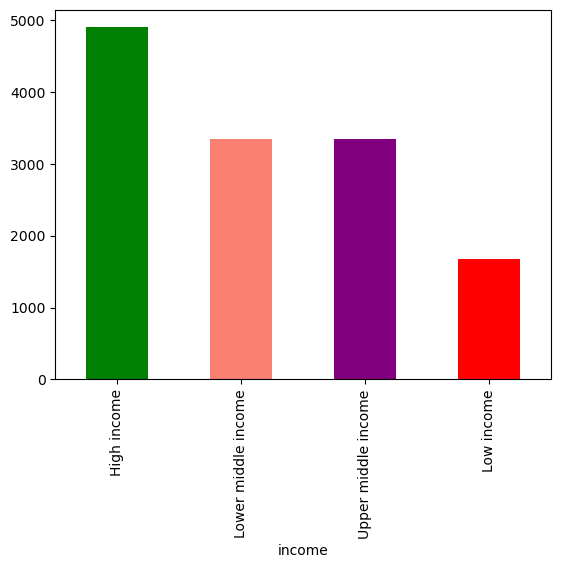

In [10]:
# visualizing the multi class dependent variables for countries/regions
df["income"].value_counts().plot(kind="bar", color=["green", "salmon", "purple", "red"])
plt.show();

In [11]:
data_dict.head()

,Indicator Code,Indicator Name
0,GFDD.AI.01,"Bank accounts per 1,000 adults"
1,GFDD.AI.02,"Bank branches per 100,000 adults"
2,GFDD.AI.03,Firms with a bank loan or line of credit (%)
3,GFDD.AI.04,Small firms with a bank loan or line of credit (%)
4,GFDD.AI.05,Financial institution account (% age 15+)


In [12]:
df.head()

,iso3,iso2,imfn,country,region,income,year,ai01,ai02,ai03,...,oi14,oi15,oi16,oi16a,oi17,oi18,oi19,oi20a,om01,om02
0,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1960,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1961,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1962,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1963,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1964,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.describe()

,imfn,year,ai01,ai02,ai03,ai04,ai05,ai06,ai07,ai08,...,oi14,oi15,oi16,oi16a,oi17,oi18,oi19,oi20a,om01,om02
count,13268.000000,13268.000000,1408.000000,3008.000000,304.000000,304.000000,554.000000,554.000000,554.000000,288.000000,...,6146.000000,2603.000000,1117.000000,796.000000,818.000000,968.000000,10209.000000,852.000000,2757.000000,2323.000000
mean,576.892523,1990.500000,2689.462933,31.491100,34.488158,29.007237,55.506408,22.891011,20.455632,6.628264,...,60.290685,35.734153,38.337511,46.762601,1.502763,4.247758,0.044960,13.947664,27.967784,35.155484
std,270.983816,17.896205,19506.225940,128.412171,17.671451,16.928612,31.585721,19.691949,17.619105,4.927859,...,497.636496,27.185474,33.746177,33.477469,1.202218,4.521651,0.207227,18.370769,54.004934,569.721928
min,111.000000,1960.000000,0.000000,0.140000,2.700000,1.900000,0.400000,0.120000,0.600000,0.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-86.740000
25%,328.000000,1975.000000,147.795000,5.177500,19.675000,14.350000,27.607500,7.855000,7.692500,2.912500,...,5.410000,13.000000,7.000000,16.180000,0.672500,0.810000,0.000000,0.000000,3.800000,-5.745000
50%,613.000000,1990.500000,473.060000,13.795000,35.450000,28.850000,52.480000,15.375000,15.130000,5.350000,...,14.200000,32.000000,26.000000,42.980000,1.270000,2.450000,0.000000,5.900000,11.600000,7.280000
75%,823.000000,2006.000000,972.202500,24.925000,47.325000,41.125000,87.487500,33.090000,27.075000,9.557500,...,35.840000,57.000000,69.000000,78.490000,2.037500,6.510000,0.000000,21.000000,31.440000,23.285000
max,1012.000000,2021.000000,273253.870000,1784.200000,79.600000,72.500000,100.000000,80.930000,82.830000,24.260000,...,19179.860000,100.000000,100.000000,100.000000,8.660000,19.630000,1.000000,100.000000,935.940000,22422.990000


If a country has an IMFN (Net Financial Flows from the IMF, Nonconcessional) value of 314, it means that the country has received a net inflow of $314 million from the International Monetary Fund (IMF) on nonconcessional terms during the specified period (usually a year)

- Positive IMFN (+314) - The country borrowed more from the IMF than it repaid.
- Negative IMFN (+314) - The country repaid more than it borrowed (net outflow).
- Zero IMFN (0) - No net financial flow from the IMF (either no borrowing or full repayment).
  
 the numerical inputations are in millions of dollars

In [14]:
df["country"].value_counts()

country
Aruba           62
Afghanistan     62
Angola          62
Albania         62
Andorra         62
                ..
Kosovo          62
Yemen, Rep.     62
South Africa    62
Zambia          62
Zimbabwe        62
Name: count, Length: 214, dtype: int64

In [15]:
# comparing the each countries income level using pd.crosstab
comparison = pd.crosstab(index=df["income"], columns=df["country"])
comparison

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
income,,,,,,,,,,,,,,,,,,,,,
High income,0,0,0,62,0,62,0,0,62,62,...,62,0,0,0,0,62,0,0,0,0
Low income,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,62,62,0
Lower middle income,0,0,62,0,62,0,0,0,0,0,...,0,62,62,0,62,0,62,0,0,62
Upper middle income,0,62,0,0,0,0,62,62,0,0,...,0,0,0,62,0,0,0,0,0,0


we can deduce from the comparison above that countries like Andorra, Autralia, u.s etc are high income countries 

In [16]:
# checking for missing values
df.isnull().sum()

iso3           0
iso2          62
imfn           0
country        0
region         0
           ...  
oi18       12300
oi19        3059
oi20a      12416
om01       10511
om02       10945
Length: 115, dtype: int64

In [17]:
df['iso3']

0        ABW
1        ABW
2        ABW
3        ABW
4        ABW
        ... 
13263    ZWE
13264    ZWE
13265    ZWE
13266    ZWE
13267    ZWE
Name: iso3, Length: 13268, dtype: object

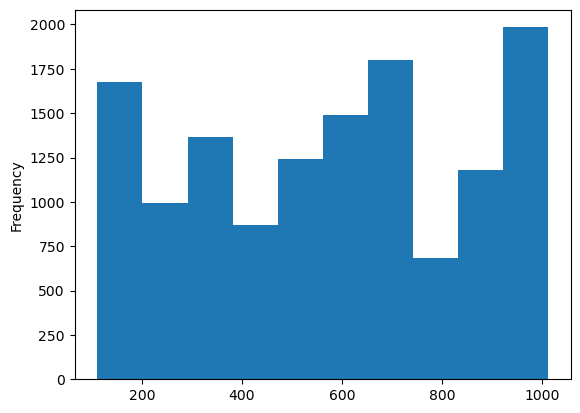

In [18]:
# ImFN hist visulaization
df["imfn"].plot.hist()
plt.show()

In [19]:
scipy.stats.skew(df["imfn"]) # The negative sign indicates slight left-skew.

np.float64(-0.09047947647273484)

In [20]:
# splitting data for training
df_copy = df.copy()

# 40percent dropped for validation and test set
df_removed = df_copy.sample(frac=0.4, random_state=42) # random_state for reproducibility

# 60percent data remaining
df_remaining = df_copy.drop(df_removed.index) 


# Further split df_remaining into 80% training and 20% test
train_df, test_df = train_test_split(df_remaining, test_size=0.2, random_state=42)

# Save all parts to CSV
train_df.to_csv("training_data.csv", index=False) # training data
test_df.to_csv("test_data.csv", index=False)  # testing data
df_removed.to_csv("evaluation_data.csv", index=False)  # evaluation data

In [21]:
# import training csv and sorting values by year as it is a time series data
df_training = pd.read_csv("training_data.csv", 
                          encoding="utf-8", low_memory=False)
df_training.head()

,iso3,iso2,imfn,country,region,income,year,ai01,ai02,ai03,...,oi14,oi15,oi16,oi16a,oi17,oi18,oi19,oi20a,om01,om02
0,GRL,GL,326,Greenland,Europe & Central Asia,High income,1973,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,GNB,GW,654,Guinea-Bissau,Sub-Saharan Africa,Low income,1985,NaN,NaN,NaN,...,31.98,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,BLZ,BZ,339,Belize,Latin America & Caribbean,Upper middle income,1976,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1984,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,KOR,KR,542,"Korea, Rep.",East Asia & Pacific,High income,1969,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Columns: 115 entries, iso3 to om02
dtypes: float64(108), int64(2), object(5)
memory usage: 5.6+ MB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13268 entries, 0 to 13267
Columns: 115 entries, iso3 to om02
dtypes: float64(108), int64(2), object(5)
memory usage: 11.6+ MB


In [24]:
df_training.head(2)

,iso3,iso2,imfn,country,region,income,year,ai01,ai02,ai03,...,oi14,oi15,oi16,oi16a,oi17,oi18,oi19,oi20a,om01,om02
0,GRL,GL,326,Greenland,Europe & Central Asia,High income,1973,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,GNB,GW,654,Guinea-Bissau,Sub-Saharan Africa,Low income,1985,NaN,NaN,NaN,...,31.98,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [25]:
# function for dropping columns with more than 70percent nan values
def columns_to_drop(df):
    """
    columns of 70% missing values to be dropped
    """
    missing_percentage = df.isna().mean() * 100 # Compute the percentage of missing values in each column
    to_be_dropped = missing_percentage[missing_percentage > 70].index # Filtering columns where NaN values are greater than 70%
    df_cleaned = df.drop(columns=to_be_dropped)
    return df_cleaned

In [26]:
# make a copy of df
df_training_copy = df_training.copy()

# dropping columns
col_training_cleaned = columns_to_drop(df_training)
col_training_cleaned.head()

,iso3,iso2,imfn,country,region,income,year,di01,di02,di04,...,si04,oi02,oi07,oi09,oi10,oi11,oi12,oi13,oi14,oi19
0,GRL,GL,326,Greenland,Europe & Central Asia,High income,1973,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,GNB,GW,654,Guinea-Bissau,Sub-Saharan Africa,Low income,1985,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.98,0.0
2,BLZ,BZ,339,Belize,Latin America & Caribbean,Upper middle income,1976,31.76,34.85,95.69,...,95.62,33.22,114.73,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,ABW,AW,314,Aruba,Latin America & Caribbean,High income,1984,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,KOR,KR,542,"Korea, Rep.",East Asia & Pacific,High income,1969,31.92,32.08,90.05,...,116.76,27.34,13454.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### incase you are wondering why i dropped columns where Nan values are greater than 70%

- Correlation is based on pairwise comparisons between the varibles to show the magnitude at which one feature affects the other.
  
- When many values are missing, fewer valid pairs remain, which reduces statistical power and may lead to unstable correlation estimates.
  
- If too many NaNs exist in one column but not the others, the correlation may be closer to 0, making relationships appear weaker than they are.

  
- we dont want a misleading correlation

  

In [27]:
col_training_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iso3     6368 non-null   object 
 1   iso2     6337 non-null   object 
 2   imfn     6368 non-null   int64  
 3   country  6368 non-null   object 
 4   region   6368 non-null   object 
 5   income   6368 non-null   object 
 6   year     6368 non-null   int64  
 7   di01     4101 non-null   float64
 8   di02     4133 non-null   float64
 9   di04     3792 non-null   float64
 10  di05     4073 non-null   float64
 11  di06     3842 non-null   float64
 12  di08     4098 non-null   float64
 13  di09     1922 non-null   float64
 14  di10     2089 non-null   float64
 15  di12     4109 non-null   float64
 16  di14     3189 non-null   float64
 17  ei08     2945 non-null   float64
 18  si04     4079 non-null   float64
 19  oi02     4045 non-null   float64
 20  oi07     4247 non-null   float64
 21  oi09     2049 

In [28]:
# cleaned nan columns vs intial columns 
df_training_copy.shape, col_training_cleaned.shape

((6368, 115), (6368, 28))

In [29]:
115 - 28

87

phew! we had a total of 87 columns with over 70percent missing values

In [30]:
df["income"].sample(20)

6137     Upper middle income
1743     Lower middle income
8325              Low income
10613             Low income
5602     Lower middle income
9694     Upper middle income
9477     Lower middle income
7075             High income
2649     Lower middle income
11763    Lower middle income
995      Lower middle income
9107             High income
383      Upper middle income
12822    Lower middle income
4664             High income
7027     Lower middle income
12640    Upper middle income
7173             High income
11375            High income
5649     Upper middle income
Name: income, dtype: object

In [31]:
# Selecting  only numeric columns
df_numeric = col_training_cleaned.select_dtypes(include=["number"])
df_numeric.head(2)

,imfn,year,di01,di02,di04,di05,di06,di08,di09,di10,...,si04,oi02,oi07,oi09,oi10,oi11,oi12,oi13,oi14,oi19
0,326,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,654,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.98,0.0


#### checking for magnitude of patterns between features (correlation matrix)
A correlation matrix is a table that shows the correlation coefficients between multiple variables in a dataset. It helps in understanding how strongly and in what direction different variables are related to each other.

##### If it ranges from -1 to 1:

1. +1 → Perfect positive correlation (as one variable increases, the other increases).
2. -1 → Perfect negative correlation (as one variable increases, the other decreases).
3. 0 → No correlation (the variables are unrelated).

##### Why i use a Correlation Matrix?

1. Feature Selection in Machine Learning (remove highly correlated features to avoid multicollinearity).
2. Understand Relationships between financial, economic, or scientific data.
3. Detect Hidden Patterns in datasets.

In [32]:
# date time column drop for correlation matrix visualization
col_drop = ["year"]

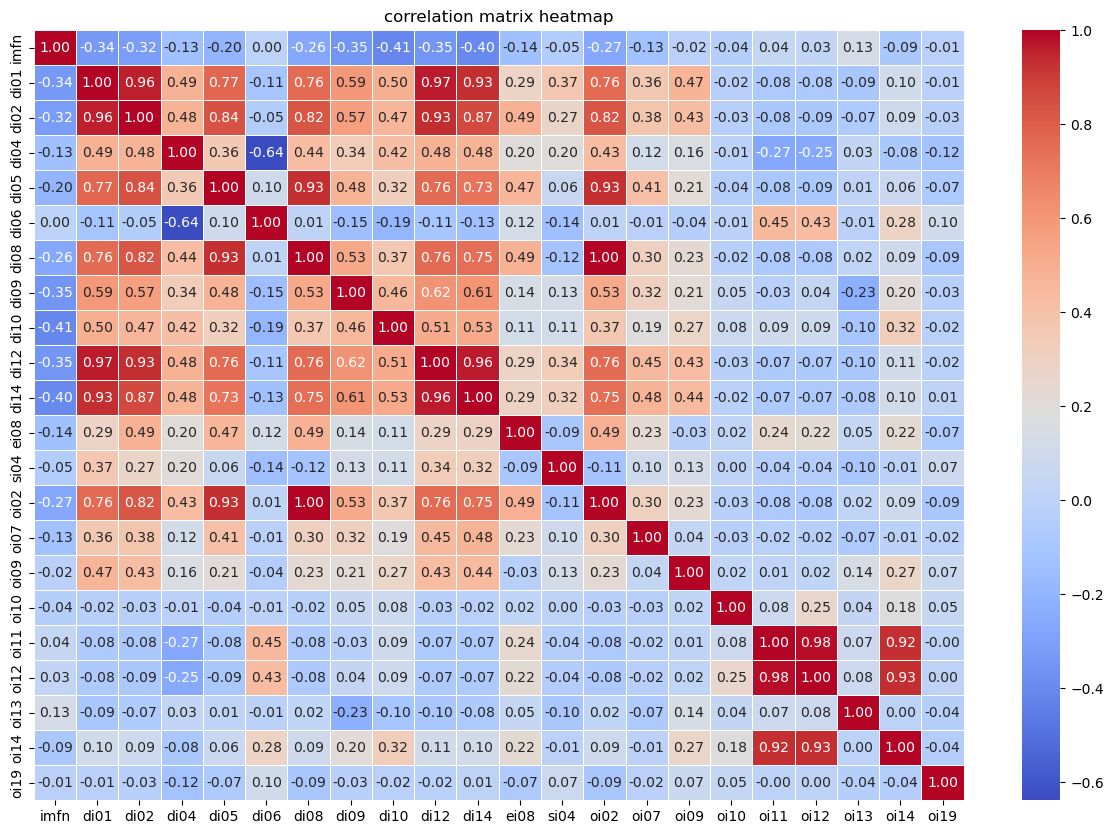

In [33]:
# correlation matrix heat map

plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.drop(columns=col_drop).sample(frac=0.2, random_state=42).corr(),
            annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm")
plt.title("correlation matrix heatmap")
plt.show()

- Red shades → Strong positive correlation.
- Blue shades → Strong negative correlation.
- Lighter colors → Weaker correlations.

In [34]:
# import evaluation csv
evaluation_df = pd.read_csv("evaluation_data.csv", 
                          encoding="utf-8", low_memory=False)

In [35]:
evaluation_df.head(2)

,iso3,iso2,imfn,country,region,income,year,ai01,ai02,ai03,...,oi14,oi15,oi16,oi16a,oi17,oi18,oi19,oi20a,om01,om02
0,JOR,JO,439,Jordan,Middle East & North Africa,Upper middle income,1993,NaN,NaN,NaN,...,25.17,NaN,NaN,NaN,NaN,NaN,0.0,NaN,24.04,NaN
1,TLS,TL,537,Timor-Leste,East Asia & Pacific,Lower middle income,1981,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [36]:
evaluation_df.shape

(5307, 115)

In [37]:
# dropping columns with more than 70percent nan values
col_eval_clean = columns_to_drop(df=evaluation_df)

In [38]:
col_eval_clean.head(2)

,iso3,iso2,imfn,country,region,income,year,di01,di02,di04,...,si04,oi02,oi07,oi09,oi10,oi11,oi12,oi13,oi14,oi19
0,JOR,JO,439,Jordan,Middle East & North Africa,Upper middle income,1993,58.68,75.05,81.01,...,73.93,79.38,9352.76,12.4,NaN,NaN,NaN,18.55,25.17,0.0
1,TLS,TL,537,Timor-Leste,East Asia & Pacific,Lower middle income,1981,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [39]:
# comparing with eval columns with previously cleaned training column 
col_eval_clean.shape, col_training_cleaned.shape

((5307, 28), (6368, 28))

lets have another test sample from the evaluation sample(therefore we have two test samples, one of them was exported to csv and this one will be in our jupyter notebook).

reason for this is we want to be sure that the ml model will be able to perform very well on unseen data outside of this jupyter notebook. Also, in the course of training the ml model. There might be cases of data leakages due to typo error

In [40]:
# test data inside of the jupyter notebook
col_test_clean = col_eval_clean.sample(frac=0.1, random_state=42, ignore_index=True)
col_eval_clean.drop(index=col_test_clean.index, inplace=True)

In [41]:
col_test_clean.shape, col_eval_clean.shape, col_training_cleaned.shape

((531, 28), (4776, 28), (6368, 28))

In [42]:
col_training_cleaned.head(2)

,iso3,iso2,imfn,country,region,income,year,di01,di02,di04,...,si04,oi02,oi07,oi09,oi10,oi11,oi12,oi13,oi14,oi19
0,GRL,GL,326,Greenland,Europe & Central Asia,High income,1973,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,GNB,GW,654,Guinea-Bissau,Sub-Saharan Africa,Low income,1985,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.98,0.0


#### Data Preprocessing and training

Data preprocessing is the process of cleaning, transforming, and organizing raw data into a format that can be effectively used by machine learning models. It's a crucial step to ensure accurate and reliable predictions.


##### steps taken:

1. encode the dependent variable/income for the taining and validation data using fit_transform for training and transform alone for validation to prevent data leakage.
   
2. Next is encode the categrical columns of the explanatory/independent variable and fill missing values

3. create a pipeline to merge 1 and 2. above and feed to model for training.


In [43]:
# split training and Evaluation data into x and y 

train_x = col_training_cleaned.drop("income", axis=1)
train_y = col_training_cleaned["income"]

eval_x = col_eval_clean.drop("income", axis=1)
eval_y = col_eval_clean["income"]

encoder = LabelEncoder() # Label encoder for dependent variable

# using fit_tranform and transform on as earlier stated

y_train_encoded = encoder.fit_transform(train_y)

y_eval_encoded = encoder.transform(eval_y)

print("Classes:", encoder.classes_)

Classes: ['High income' 'Low income' 'Lower middle income' 'Upper middle income']


In [44]:
y_train_encoded

array([0, 1, 3, ..., 3, 0, 2], shape=(6368,))

In [45]:
y_eval_encoded

array([0, 1, 3, ..., 2, 3, 0], shape=(4776,))

In [46]:
# defining categorical and numerical features for transformation

categorical_features = [col for col in train_x.columns if train_x[col].dtype == 'object']
numerical_features = [col for col in train_x.columns if train_x[col].dtype != 'object' and col != 'income'] # taking precaution tho we already seperated the label, to prevent data leak

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['iso3', 'iso2', 'country', 'region']
Numerical Features: ['imfn', 'year', 'di01', 'di02', 'di04', 'di05', 'di06', 'di08', 'di09', 'di10', 'di12', 'di14', 'ei08', 'si04', 'oi02', 'oi07', 'oi09', 'oi10', 'oi11', 'oi12', 'oi13', 'oi14', 'oi19']


In [47]:
# Categorical Transformer: One-Hot Encoding with Imputation
categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy="constant", fill_value="unknown")),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-Hot Encoding
])

# Numerical Transformer: Median Imputation
numerical_transformer = SimpleImputer(strategy='median') # best for outliers due to error inputs 


# ColumnTransformer for preprocessing 
preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
])

# Full pipeline with RandomForest
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])


# Fit the pipeline
pipeline.fit(train_x, y_train_encoded)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['iso3', 'iso2', 'country',
                                                   'region']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['imfn', 'year', 'di01',
                                                   'di02', 'di04', 'di05',
                                                   'di06', 'di08', 'di09',
                                                   'di10', 'di12', 'di14',
                                                   'ei08', 'si04', 'oi02',
                                                   'oi07', 'oi09', 'oi10',
                                                   'oi11', 'oi12', 'oi13',
                                                   'oi14', 'oi19'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [48]:
pipeline.score(train_x, y_train_encoded)

1.0

In [49]:
pipeline.score(eval_x, y_eval_encoded)

0.9981155778894473

In [50]:
# Predict on Evaluation Set
y_pred_encoded = pipeline.predict(eval_x)

In [51]:
y_pred_encoded

array([0, 1, 3, ..., 2, 3, 0], shape=(4776,))

In [52]:
# Decode Predictions Back to Original Labels
y_pred = encoder.inverse_transform(y_pred_encoded)

In [53]:
y_pred

array(['High income', 'Low income', 'Upper middle income', ...,
       'Lower middle income', 'Upper middle income', 'High income'],
      shape=(4776,), dtype=object)

## Hyperparameter tuning using Randomised search CV and Gridsearch

In [54]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
# In a Pipeline, parameters must be referenced with their step namei.e model__n_estimators, model__max_depth etc (double underscore)
rf_grid = {
    "model__n_estimators": [50, 200, 500],  # Lower number of trees to reduce training time
    "model__max_depth": [None, 5, 10],  # Fewer depth options
    "model__min_samples_split": [2, 10],  # Fewer values
    "model__min_samples_leaf": [1, 5],  # Reducing choices
    "model__max_features": ["sqrt"],  # Only best-known setting to reduce computation
}

# import seed
np.random.seed(42)

# setting up hyperparameter search 
rs_rf = RandomizedSearchCV(estimator=pipeline,
                               param_distributions=rf_grid,
                               n_iter=20,
                               cv=5,
                               verbose=True,
                          scoring="accuracy",random_state=42)
rs_rf.fit(train_x, y_train_encoded);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [56]:
rs_rf.best_params_

{'model__n_estimators': 200,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': None}

In [57]:
rs_rf.score(eval_x, y_eval_encoded)

0.9987437185929648

In [58]:
# using best parameter from the exhaustive random search on grid search
best_rf_params = {'model__n_estimators': [200],
 'model__min_samples_split': [2],
 'model__min_samples_leaf': [1],
 'model__max_features': ['sqrt'],
 'model__max_depth': [None]}

#setup hyperparameter search for rf
gs_random_forest = GridSearchCV(estimator=pipeline,
                               param_grid=best_rf_params,
                               cv=5,
                               verbose=True,
                    scoring="accuracy") # using accuracy for a multiclass classification
gs_random_forest.fit(train_x, y_train_encoded);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [59]:
# score model performance on validation data
gs_random_forest.score(eval_x, y_eval_encoded)

0.9987437185929648

Phew! remember our proof of concept is 90 percent for project to be pursued, we already hit the mark and almost attained 100percent... Great!

note: if we didnt hit the 90percent mark, then we would atleast know what doesnt work and try different models, feature engineering etc until our goal is achieved

In [76]:
import joblib
joblib.dump(gs_random_forest,"gs_random_forest.pk1") # save model

['gs_random_forest.pk1']

In [60]:
# testing data 
x_test = col_test_clean.drop("income", axis=1)
y_test = col_test_clean["income"]

In [61]:
# making predictions
y_pred = gs_random_forest.predict(x_test)
y_pred

array([0, 2, 0, 1, 3, 1, 0, 0, 3, 0, 2, 2, 3, 3, 2, 1, 0, 0, 0, 2, 0, 1,
       2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 0, 2, 0, 3, 2, 3, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 3, 2, 1, 2, 2, 0, 2, 3, 0, 3, 1, 0, 0, 0, 3, 0, 2, 0,
       0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 1, 3, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       0, 1, 3, 0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 3, 3, 2, 0, 3,
       1, 3, 3, 3, 3, 1, 3, 0, 0, 0, 3, 3, 1, 1, 2, 0, 0, 2, 0, 3, 0, 1,
       2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0, 0, 3, 0, 3, 1, 1, 0, 0,
       2, 1, 1, 2, 0, 0, 3, 0, 0, 2, 2, 2, 0, 2, 1, 3, 0, 3, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0,
       3, 2, 0, 1, 2, 0, 0, 0, 3, 3, 3, 2, 0, 3, 3, 2, 2, 0, 2, 1, 0, 2,
       0, 2, 2, 0, 3, 2, 3, 1, 0, 0, 3, 0, 0, 0, 3, 0, 2, 3, 1, 2, 2, 0,
       3, 2, 3, 0, 2, 0, 3, 1, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 3, 0, 0,
       0, 2, 3, 0, 2, 0, 0, 0, 2, 1, 0, 3, 3, 1, 3, 0, 3, 1, 0, 0, 3, 3,
       0, 2, 0, 1, 0, 3, 2, 0, 1, 0, 1, 3, 1, 0, 2,

In [62]:
# decode it and display results
y_pred_decoded = encoder.inverse_transform(y_pred)

print("decoded Predictions:", y_pred_decoded)

decoded Predictions: ['High income' 'Lower middle income' 'High income' 'Low income'
 'Upper middle income' 'Low income' 'High income' 'High income'
 'Upper middle income' 'High income' 'Lower middle income'
 'Lower middle income' 'Upper middle income' 'Upper middle income'
 'Lower middle income' 'Low income' 'High income' 'High income'
 'High income' 'Lower middle income' 'High income' 'Low income'
 'Lower middle income' 'High income' 'Low income' 'Upper middle income'
 'Upper middle income' 'High income' 'High income' 'Low income'
 'Upper middle income' 'High income' 'High income' 'Lower middle income'
 'High income' 'Upper middle income' 'Lower middle income'
 'Upper middle income' 'High income' 'High income' 'High income'
 'High income' 'Lower middle income' 'High income' 'High income'
 'Lower middle income' 'High income' 'Lower middle income'
 'Upper middle income' 'Lower middle income' 'Low income'
 'Lower middle income' 'Lower middle income' 'High income'
 'Lower middle income' 

In [63]:
# visualizing comparisons between predictions and true values
comparison = {
    "True income value": y_test,
    "Decoded model predictions": y_pred_decoded,
    "Encoded model predictions": y_pred,
}

In [64]:
comparison_df = pd.DataFrame(comparison)

In [65]:
comparison_df

,True income value,Decoded model predictions,Encoded model predictions
0,High income,High income,0
1,Lower middle income,Lower middle income,2
2,High income,High income,0
3,Low income,Low income,1
4,Upper middle income,Upper middle income,3
...,...,...,...
526,High income,High income,0
527,High income,High income,0
528,High income,High income,0
529,High income,High income,0


In [66]:
# import new test data 
unseen_data_df = pd.read_csv("test_data.csv")

In [67]:
unseen_data_df.head(2)

,iso3,iso2,imfn,country,region,income,year,ai01,ai02,ai03,...,oi14,oi15,oi16,oi16a,oi17,oi18,oi19,oi20a,om01,om02
0,CYM,KY,377,Cayman Islands,Latin America & Caribbean,High income,1979,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,CPV,CV,624,Cabo Verde,Sub-Saharan Africa,Lower middle income,1995,NaN,NaN,NaN,...,5.54,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [68]:
## split to x and y data
x_unseen_data = unseen_data_df.drop("income", axis=1)
y_unseen_data = unseen_data_df["income"]

In [69]:
# predict independent/explainable features
y_preds_unseen_data = gs_random_forest.predict(x_unseen_data)

In [70]:
y_preds_unseen_data

array([0, 2, 2, ..., 2, 2, 3], shape=(1593,))

In [71]:
decoded_y_preds_unseen = encoder.inverse_transform(y_preds_unseen_data)

In [72]:
decoded_y_preds_unseen

array(['High income', 'Lower middle income', 'Lower middle income', ...,
       'Lower middle income', 'Lower middle income',
       'Upper middle income'], shape=(1593,), dtype=object)

In [73]:
# visualizing comparisons between predictions and true values
comparison_unseen_data_predictions = {
    "True income value": y_unseen_data,
    "Decoded model predictions": decoded_y_preds_unseen,
    "Encoded model predictions": y_preds_unseen_data,
}

In [74]:
comparison_unseen_data_predictions_df = pd.DataFrame(comparison_unseen_data_predictions)

In [75]:
comparison_unseen_data_predictions_df

,True income value,Decoded model predictions,Encoded model predictions
0,High income,High income,0
1,Lower middle income,Lower middle income,2
2,Lower middle income,Lower middle income,2
3,High income,High income,0
4,High income,High income,0
...,...,...,...
1588,Upper middle income,Upper middle income,3
1589,High income,High income,0
1590,Lower middle income,Lower middle income,2
1591,Lower middle income,Lower middle income,2


### Setting up streamlit for deployment

In [77]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import io  # For capturing df.info()

# Set Streamlit page configuration
st.set_page_config(page_title="Global Finance Prediction", layout="wide")

# Load trained model
@st.cache_resource
def load_model():
    return joblib.load("gs_random_forest.pkl")  

model = load_model()

# App title
st.title("Global Finance Multi-Class Prediction System")
st.write(
    """
    This application predicts financial indicators based on given features. 
    Upload a CSV file to get predictions. The model has been fine-tuned using RandomForestClassifier.
    Accuracy is set at 95%. Data was gotten from The Global Financial Development Database
    https://www.worldbank.org/en/publication/gfdr/data/global-financial-development-database
    the dataset in the link contains data dictionary of the features.
    Email me at nosakhareasowata94@gmail.com for feedback/remarks 
    as i will be updating my code from the feedbacks i get, thanks in anticipation😊.
    """
)

# Provide test file download link
st.write("### Download Test File (CSV Format) and make your predictions")
csv_url = "https://docs.google.com/spreadsheets/d/1AW6yl0CrERXPYng8Nzfih5vL6FNlYxoJJd6OleLnihE/export?format=csv"
st.markdown(f"[Download Sample Test File]({csv_url})")

st.write("### Download Test File results (CSV Format) and compare with model predictions")
csv_url = "https://docs.google.com/spreadsheets/d/1ZHtRcQeDEGguMpQMoPyyFR-2QwD1ZrnXIXXxgqPoaWI/export?format=csv"
st.markdown(f"[Download Sample Test File]({csv_url})") 


# Upload CSV file
uploaded_file = st.file_uploader("Upload CSV for Prediction", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    
    st.write("### Uploaded Data Preview:")
    st.dataframe(df.head())
    
    # Show dataset information
    st.write("### Data Information:")
    buffer = io.StringIO()
    df.info(buf=buffer)
    st.text(buffer.getvalue())
    
    # Ensure the dataset has the expected features
    expected_features = model.feature_names_in_
    if all(feature in df.columns for feature in expected_features):
        predictions = model.predict(df[expected_features])
        df["Predicted_Label"] = predictions
        df["Income_Category"] = df["Predicted_Label"].apply(lambda x: "High Income" if x == 0 else "Low Income" if x == 1 else "Lower Middle Income" if x == 2 else "Upper Middle Income")
        
        st.write("### Predictions:")
        st.dataframe(df[["Predicted_Label", "Income_Category"].head()])
        
        # Visualization
        st.write("### Predictions Distribution:")
        plt.figure(figsize=(8, 5))
        sns.countplot(x="Income_Category", data=df)
        plt.title("Distribution of Predictions")
        st.pyplot(plt)
        
        # Download predictions
        csv = df.to_csv(index=False).encode("utf-8")
        st.download_button("Download Predictions", csv, "predictions.csv", "text/csv")
    else:
        st.error("Uploaded CSV does not match required features for prediction.")


Writing app.py
